In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.convolution import Box1DKernel, convolve
from scipy.signal import savgol_filter

%matplotlib widget

In [4]:
dir_path = "/Users/neelsharma/Desktop/ASTRProjects/G165/MMT/LongExposure/obj_abs_1D"

slit = "slitA037_a111t100829.fits"

filename = dir_path + "/" + slit

x, header = fits.getdata(filename, header = True)

hdul = fits.open(filename)
image_data = hdul[0].data
skysub = image_data[0]
sky = image_data[1]

wv = header["CRVAL1"] + header["CDELT1"]*np.arange(header["NAXIS1"])

In [5]:
'''
A dictionary of all the line features and their occurences at 1 or more wavelengths.
'''

l_dict = {'Lylim': [912], 
            'Lyb': [1026], 
            'Lya': [1215.67], 
            'NV': [1240], 
            'SiII': [1260, 1527], 
            'CIII/SiIII': [1296.3], 
            'CII/NIII': [1323.9], 
            'SiII/OI': [1302], 
            ' ': [1304, 1403, 1550, 2799, 3970, 5167, 5184], 
            'CII': [1335, 2326], 
            'OIV': [1343.354], 
            'SiIV': [1394], 
            'SiIII': [1417.237], 
            'CIII': [1427.85, 1909], 
            'SV': [1501.76], 
            'CIV': [1548], 
            'FeII': [1608, 2344, 2374, 2587], 
            'HeII': [1640], 
            'AlII': [1671], 
            'AlIII': [1855], 
            '.': [1863, 2600, 5889, 5896, 6583, 6730], 
            'NeIV': [2424], 'MgII': [2796], 
            'NeV': [3346, 3426], 
            '[OII]': [3727], 
            'Hth': [3798], 
            'Heta': [3835], 
            'Hz': [3889], 
            'K': [3933], 
            'H,Hep': [3968], 
            'Hd': [4102], 
            'Gb': [4304], 
            'Hg': [4340], 
            'Hb': [4861], 
            '[OIII]': [4959, 5007], 
            'MgI': [5173], 
            'HeI,NaD': [5876], 
            'NII': [6548], 
            'Ha': [6563], 
            'SII': [6716], 
            'TiO': [7040], 
            'HeI': [7065.3], 
            'KI': [7680], 
            'NaI': [8190], 
            'Cs': [8520]}

In [6]:
boxcar = Box1DKernel(17)
skysub_box = convolve(skysub, boxcar)
sky_box = convolve(sky, boxcar)

In [7]:
zed = 4.13

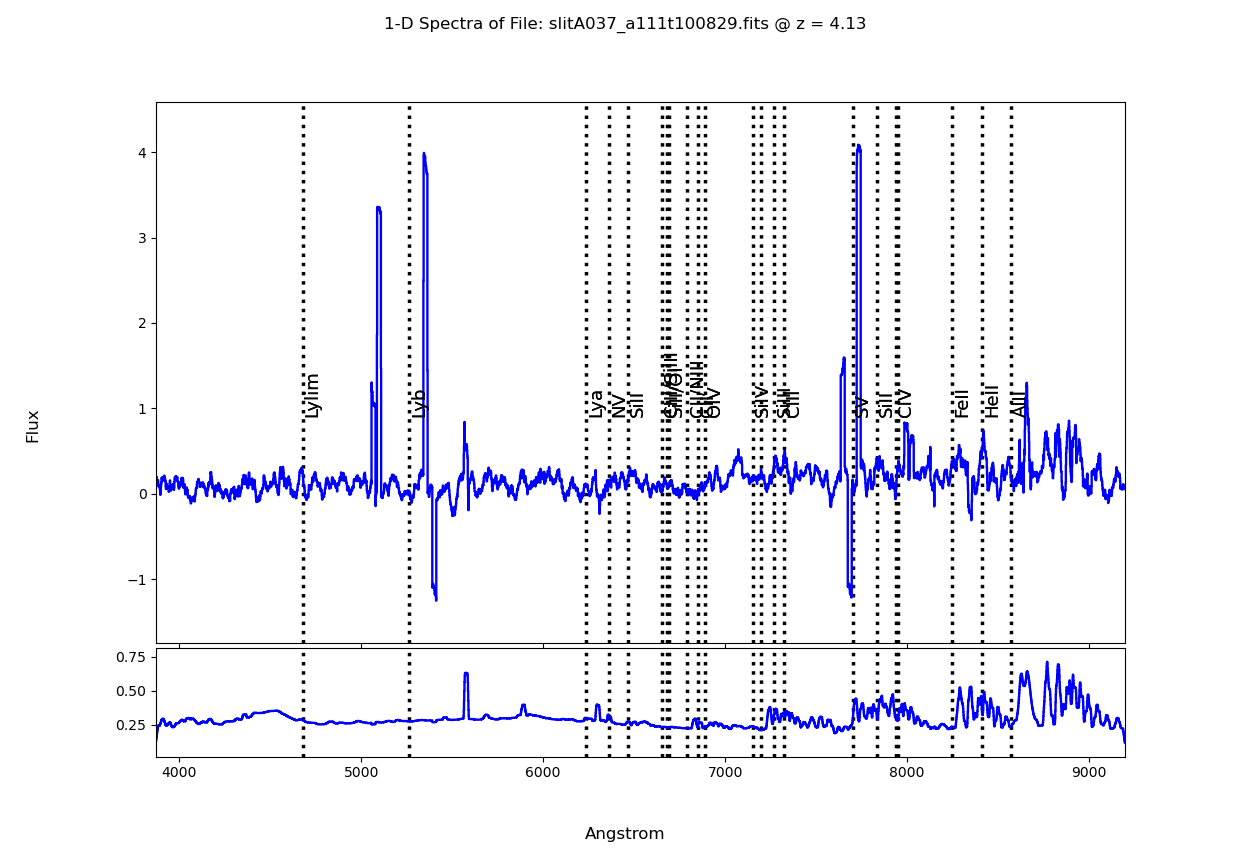

In [8]:
fig, axs = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': [5,1],'hspace': 0.015}, figsize=(12.5,8.5)) 
plt.suptitle("1-D Spectra of File: " + slit + ' @ z = ' + str(zed))

ymin_skysub = np.min(skysub_box) - 0.5
ymax_skysub = np.max(skysub_box) + 0.5

axs[0].set_ylim(ymin_skysub, ymax_skysub)
axs[1].set_ylim(np.min(sky_box) - 0.1, np.max(sky_box) + 0.1)

for num in range(0,2):
    axs[num].set_xlim(np.min(wv), np.max(wv))

yann = (ymax_skysub+ymin_skysub)/3
yann2 = (ymax_skysub+ymin_skysub)/3
label_placement = (ymax_skysub+ymin_skysub)/3
xoffs = 5



for key in l_dict.keys():
    if len(l_dict[key]) == 1:
        lf = l_dict[key][0] * (1+zed)
        for num in range(0,2):
            axs[num].axvline(x=lf, color='black',lw=2.5,ls=':')
            axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)
    else:
        for i in range(len(l_dict[key])):
            lf = l_dict[key][i] * (1+zed)
            for num in range(0,2):
                axs[num].axvline(x=lf, color='black',lw=2.5,ls=':')
                axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)
    
#for i in skylines:
#skylines = [5577, 5895, 6301, 6875, 7246, 7600]
#    for num in range(0,2):
#        axs[num].axvline(x=i, color='green',lw=2,ls='-')
#        axs[0].annotate('Skyline',(i,yann2),xytext=(i-xoffs,label_placement),rotation=90,clip_on=True, fontsize=13)

plt.axhline(0, color='green', ls = ":")

fig.supxlabel('Angstrom', fontsize = 12)
fig.supylabel('Flux', fontsize = 12) 

axs[0].plot(wv, skysub_box, drawstyle='steps', color='blue', linewidth=1.7)
axs[1].plot(wv, sky_box, drawstyle='steps', color='blue', linewidth=1.7)

Mean 0.20360282
1.4σ: 0.6361716449260711
Flagged wavelengths: [5057.4999332382995, 5058.78993320015, 5060.079933162, 5061.3699331238495, 5062.6599330857, 5063.94993304755, 5065.2399330093995, 5066.52993297125, 5067.8199329331, 5069.109932894949, 5070.3999328568, 5071.68993281865, 5072.979932780499, 5074.26993274235, 5075.5599327042, 5076.849932666049, 5078.1399326279, 5087.16993236085, 5088.459932322699, 5089.74993228455, 5091.0399322464, 5092.329932208249, 5093.6199321701, 5094.90993213195, 5096.199932093799, 5097.48993205565, 5098.7799320175, 5100.069931979349, 5101.3599319412, 5102.64993190305, 5103.939931864899, 5105.22993182675, 5106.5199317886, 5107.809931750449, 5109.0999317123, 5342.58992480715, 5343.879924769, 5345.16992473085, 5346.4599246927, 5347.74992465455, 5349.0399246164, 5350.32992457825, 5351.6199245401, 5352.90992450195, 5354.1999244638, 5355.48992442565, 5356.7799243875, 5358.06992434935, 5359.3599243112, 5360.64992427305, 5361.9399242349, 5363.22992419675, 5364.519

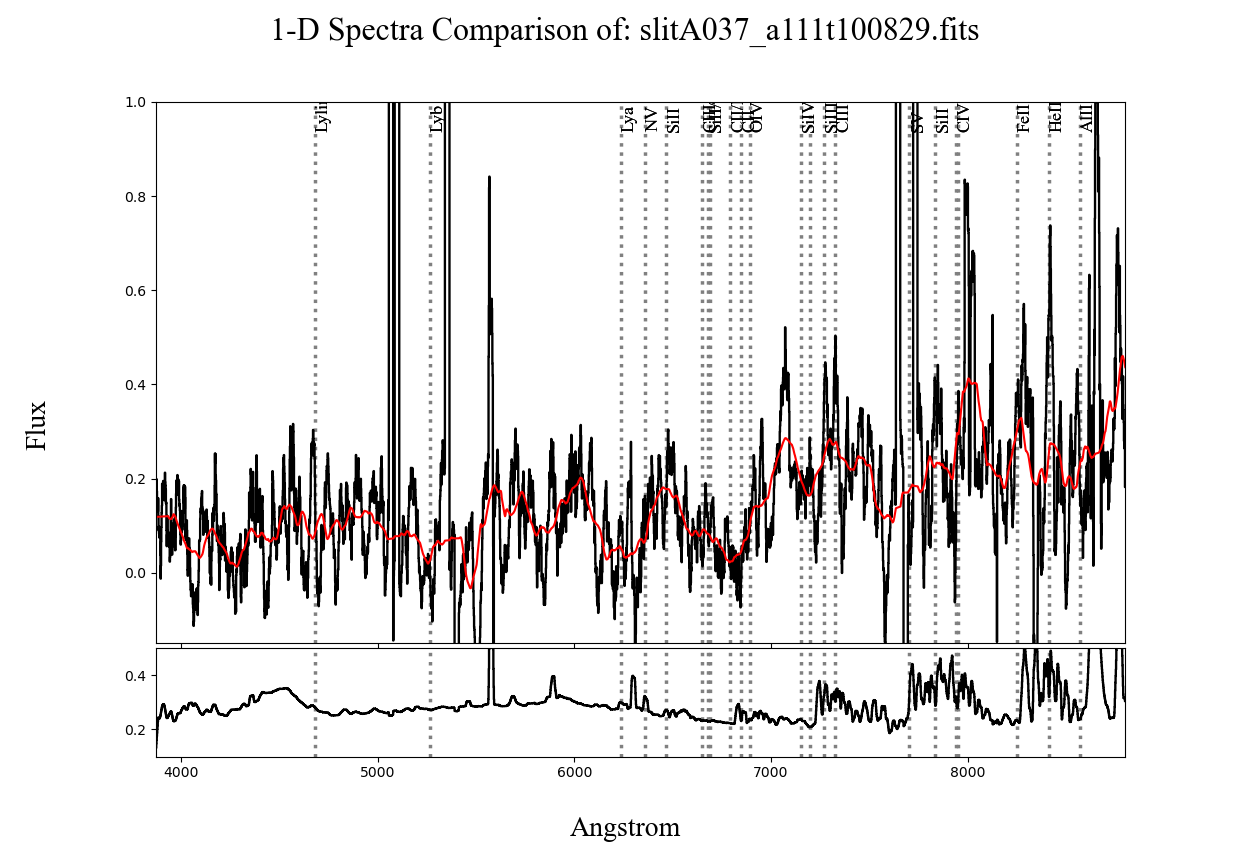

In [9]:
sigma = 1.4

fig, axs = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': [5,1],'hspace': 0.015}, figsize=(12.5,8.5)) 
plt.rcParams['font.family'] = 'Times New Roman'
plt.suptitle("1-D Spectra Comparison of: " + slit, fontsize = 23)

ymin_skysub = np.min(skysub_box) - 0.5
ymax_skysub = np.max(skysub_box) + 0.5

axs[0].set_ylim(-0.15, 1) #(ymin_skysub, ymax_skysub)
axs[1].set_ylim(0.1, 0.5) #(np.min(sky_box) - 0.1, np.max(sky_box) + 0.1)

for num in range(0,2):
    axs[num].set_xlim(np.min(wv), 8800) #(np.min(wv), np.max(wv))

yann = (ymax_skysub+ymin_skysub)/3
yann2 = (ymax_skysub+ymin_skysub)/3
label_placement = (ymax_skysub+ymin_skysub)/3
xoffs = 5

for key in l_dict.keys():
    if len(l_dict[key]) == 1:
        lf = l_dict[key][0] * (1+zed)
        for num in range(0,2):
            axs[num].axvline(x=lf, color='gray',lw=2.5,ls=':')
            axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)
    else:
        for i in range(len(l_dict[key])):
            lf = l_dict[key][i] * (1+zed)
            for num in range(0,2):
                axs[num].axvline(x=lf, color='gray',lw=2.5,ls=':')
                axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)

plt.axhline(0, color='green', ls = ":")

fig.supxlabel('Angstrom', fontsize = 20)
fig.supylabel('Flux', fontsize = 20) 

axs[0].plot(wv, skysub_box, drawstyle='steps', label='Continuum spectra ({}σ included)'.format(sigma), color='black', linewidth=1.7)
axs[1].plot(wv, sky_box, drawstyle='steps', color='black', linewidth=1.7)    
    
SKY = skysub_box

# Calculate 2-sigma deviation and mean
sigmaval = sigma * np.nanstd(SKY)
mean = np.nanmean(SKY)

# Arrays to store flagged points and their corresponding wavelengths
flagged_wavelengths = []
flagged_flux = []

# Create masks for non-flagged data points (within 2 sigma of the mean)
valid_wavelengths = []
valid_flux = []

# Loop through the spectrum and flag points that deviate more than 2 sigma from the mean
for i in range(len(skysub_box)):
    if np.abs(skysub_box[i] - mean) > sigmaval:  # Flagging deviations both above and below mean
        flagged_wavelengths.append(wv[i])  # Store the wavelength of the flagged point
        flagged_flux.append(skysub_box[i])  # Store the flux of the flagged point
    else:
        valid_wavelengths.append(wv[i])  # Use only the non-flagged wavelengths
        valid_flux.append(skysub_box[i])  # Use only the non-flagged flux values

# Savitzky-Golay for smoothing
valid_smoothed_continuum = savgol_filter(valid_flux, window_length=95, polyorder=1)
unflagged_smoothed_continuum = savgol_filter(skysub_box, window_length=95, polyorder=1)

print("Mean", mean)
print("{}σ: {}".format(sigma, sigmaval))
print("Flagged wavelengths:", flagged_wavelengths)
print("Flagged flux values:", flagged_flux)

#axs[0].plot(wv, unflagged_smoothed_continuum, label='Smoothed continuum', color='purple')
axs[0].plot(valid_wavelengths, valid_smoothed_continuum, label='Smoothed continuum ({}σ excluded)'.format(sigma), color='red')

#plt.savefig('Arc11.pdf', format='pdf')

6233
[0.16100812 0.19933201 0.19234224 ... 0.0725828  0.08724065 0.08171619]
1829
[0.11279164 0.12047946 0.09438185 ... 0.0725828  0.08724065 0.08171619]
[0.16100812 0.19933201 0.19234224 ... 0.07748696 0.08515051 0.09714344]
Mean 0.20360282
1.5σ: 0.6361716449260711
Flagged wavelengths: [5057.4999332382995, 5058.78993320015, 5060.079933162, 5061.3699331238495, 5062.6599330857, 5063.94993304755, 5065.2399330093995, 5066.52993297125, 5067.8199329331, 5069.109932894949, 5070.3999328568, 5071.68993281865, 5072.979932780499, 5074.26993274235, 5075.5599327042, 5076.849932666049, 5078.1399326279, 5087.16993236085, 5088.459932322699, 5089.74993228455, 5091.0399322464, 5092.329932208249, 5093.6199321701, 5094.90993213195, 5096.199932093799, 5097.48993205565, 5098.7799320175, 5100.069931979349, 5101.3599319412, 5102.64993190305, 5103.939931864899, 5105.22993182675, 5106.5199317886, 5107.809931750449, 5109.0999317123, 5342.58992480715, 5343.879924769, 5345.16992473085, 5346.4599246927, 5347.74992

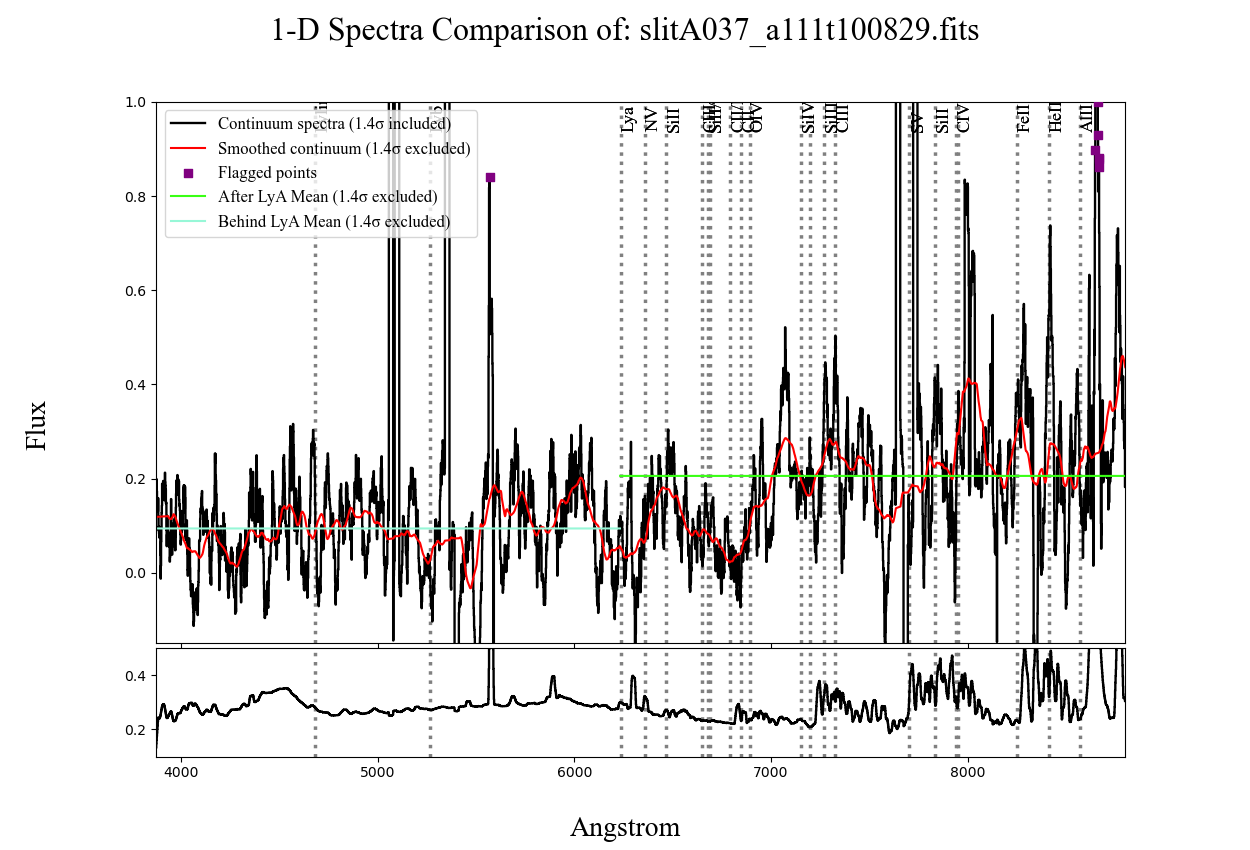

In [10]:
LyApoint = round((int(l_dict['Lya'][0])*(1+zed)))

print(LyApoint)
print(skysub_box)

closest_index = np.argmin(np.abs(wv - LyApoint))

print(closest_index)

ALA = skysub_box[closest_index:]
BLA = skysub_box[:closest_index]

print(ALA)
print(BLA)

# Calculate 2-sigma deviation and mean
ALA_sigmaval = sigma * np.nanstd(ALA)
ALA_mean = np.nanmean(ALA)

BLA_sigmaval = sigma * np.nanstd(BLA)
BLA_mean = np.nanmean(BLA)

# Arrays to store flagged points and their corresponding wavelengths
ALA_flagged_wavelengths = []
ALA_flagged_flux = []

BLA_flagged_wavelengths = []
BLA_flagged_flux = []

# Create masks for non-flagged data points (within 2 sigma of the mean)
ALA_valid_wavelengths = []
ALA_valid_flux = []

BLA_valid_wavelengths = []
BLA_valid_flux = []

# Loop through the spectrum and flag points that deviate more than 2 sigma from the mean
for i in range(closest_index, len(wv)):
    if np.abs(ALA[i - closest_index] - ALA_mean) > ALA_sigmaval:  # Adjust indexing here
        ALA_flagged_wavelengths.append(wv[i])  # Store the wavelength of the flagged point
        ALA_flagged_flux.append(ALA[i - closest_index])  # Adjust the flux index
    else:
        ALA_valid_wavelengths.append(wv[i])  # Store the wavelength for valid points
        ALA_valid_flux.append(ALA[i - closest_index])  # Store the flux for valid points

for i in range(len(BLA)):
    if np.abs(BLA[i] - BLA_mean) > BLA_sigmaval:  # Flagging deviations both above and below mean
        BLA_flagged_wavelengths.append(wv[i])  # Store the wavelength of the flagged point
        BLA_flagged_flux.append(BLA[i])  # Store the flux of the flagged point
    else:
        BLA_valid_wavelengths.append(wv[i])  # Use only the non-flagged wavelengths
        BLA_valid_flux.append(BLA[i])  # Use only the non-flagged flux values

# Apply Savitzky-Golay filter to the valid (non-flagged) data points for smoothing
# Note: We use only valid data points here
ALA_valid_smoothed_continuum = savgol_filter(ALA_valid_flux, window_length=95, polyorder=1)
BLA_valid_smoothed_continuum = savgol_filter(BLA_valid_flux, window_length=95, polyorder=1)

print("Mean", mean)
print("1.5σ:", sigmaval)
print("Flagged wavelengths:", flagged_wavelengths)
print("Flagged flux values:", flagged_flux)

#print(ALA_valid_wavelengths[closest_index:])

ALA_mean = np.nanmean(ALA_valid_smoothed_continuum)
BLA_mean = np.nanmean(BLA_valid_smoothed_continuum)

# Plotting the original spectrum and flagged points
#axs[0].plot(BLA_valid_wavelengths, BLA_valid_smoothed_continuum, label='Behind LyA Smoothed continuum ({}σ excluded)'.format(sigma), color='#39ff14')
#axs[0].plot(ALA_valid_wavelengths, ALA_valid_smoothed_continuum, label='After LyA Smoothed continuum ({}σ excluded)'.format(sigma), color='#97f7d7')
axs[0].scatter(flagged_wavelengths, flagged_flux, marker='s', color='purple', label='Flagged points', zorder=5)  # Highlight flagged points

ALA_mean_list = []
for i in range(len(ALA_valid_wavelengths)):
    ALA_mean_list.append(ALA_mean)

BLA_mean_list = []
for i in range(len(BLA_valid_wavelengths)):
    BLA_mean_list.append(BLA_mean)

axs[0].plot(ALA_valid_wavelengths, ALA_mean_list, label='After LyA Mean ({}σ excluded)'.format(sigma), color='#39ff14')
axs[0].plot(BLA_valid_wavelengths, BLA_mean_list, label='Behind LyA Mean ({}σ excluded)'.format(sigma), color='#97f7d7')

axs[0].legend(loc='upper left', fontsize = 12)

plt.show()

plt.savefig('Arc11.pdf', format='pdf')